# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data

        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | misratah
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | datong
Processing Record 7 of Set 1 | jhargram
Processing Record 8 of Set 1 | kapa'a
Processing Record 9 of Set 1 | bushehr
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | sao vicente
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | sosnogorsk
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | tacna
Processing Record 19 of Set 1 | shengli
Processing Record 20 of Set 1 | ouallam
Processing Record 21 of Set 1 | tionk essil
Processing Record 22 of Set 1 | waita

Processing Record 39 of Set 4 | yulinshi
Processing Record 40 of Set 4 | kosan
Processing Record 41 of Set 4 | savelugu
Processing Record 42 of Set 4 | terrace
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | mizan teferi
Processing Record 45 of Set 4 | napier
Processing Record 46 of Set 4 | aur
Processing Record 47 of Set 4 | sarandi
Processing Record 48 of Set 4 | la ronge
Processing Record 49 of Set 4 | sona
Processing Record 0 of Set 5 | ola
Processing Record 1 of Set 5 | guarapari
Processing Record 2 of Set 5 | nanping
Processing Record 3 of Set 5 | 'izbat al burj
City not found. Skipping...
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | maridi
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | hafar al-batin
Processing Record 8 of Set 5 | namibe
Processing Record 9 of Set 5 | trairi
Processing Record 10 of Set 5 | tura
Processing Record 11 of Set 5 | lander
Processing Record 12 of Set 5 | bredasdorp
Processing Reco

Processing Record 31 of Set 8 | morondava
Processing Record 32 of Set 8 | kotido
Processing Record 33 of Set 8 | rio grande
Processing Record 34 of Set 8 | la mira tumbiscatio
Processing Record 35 of Set 8 | blackwater
Processing Record 36 of Set 8 | new bern
Processing Record 37 of Set 8 | mugia
Processing Record 38 of Set 8 | monte alegre
Processing Record 39 of Set 8 | island harbour
Processing Record 40 of Set 8 | santa maria del oro
Processing Record 41 of Set 8 | mount isa
Processing Record 42 of Set 8 | at tall al kabir
Processing Record 43 of Set 8 | villa la angostura
Processing Record 44 of Set 8 | montelibano
Processing Record 45 of Set 8 | bondoukou
Processing Record 46 of Set 8 | susuman
Processing Record 47 of Set 8 | childress
Processing Record 48 of Set 8 | kokpekty
Processing Record 49 of Set 8 | gulf shores
Processing Record 0 of Set 9 | nova olimpia
Processing Record 1 of Set 9 | elko
Processing Record 2 of Set 9 | los andes
Processing Record 3 of Set 9 | kristiansun

Processing Record 20 of Set 12 | xiaoweizhai
Processing Record 21 of Set 12 | yamada
Processing Record 22 of Set 12 | abasolo
Processing Record 23 of Set 12 | sault ste. marie
Processing Record 24 of Set 12 | santa terezinha
Processing Record 25 of Set 12 | katsuura
Processing Record 26 of Set 12 | huanuni
Processing Record 27 of Set 12 | saint-philippe
Processing Record 28 of Set 12 | greytown
Processing Record 29 of Set 12 | yung shue wan
Processing Record 30 of Set 12 | shenjiamen
Processing Record 31 of Set 12 | tofol
Processing Record 32 of Set 12 | portland
Processing Record 33 of Set 12 | tosontsengel
Processing Record 34 of Set 12 | kuching
Processing Record 35 of Set 12 | bolhrad
Processing Record 36 of Set 12 | manacapuru
Processing Record 37 of Set 12 | luanda
Processing Record 38 of Set 12 | peterhead
Processing Record 39 of Set 12 | fort bragg
Processing Record 40 of Set 12 | sao gabriel da cachoeira
Processing Record 41 of Set 12 | baniachang
Processing Record 42 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,35.62,74,100,11.32,SJ,1698728357
1,thompson,55.7435,-97.8558,19.56,73,100,6.91,CA,1698728357
2,misratah,32.3754,15.0925,72.00,62,2,14.50,LY,1698728357
3,port elizabeth,-33.9180,25.5701,62.31,75,0,13.80,ZA,1698728357
4,afaahiti,-17.7500,-149.2833,78.67,83,37,20.69,PF,1698728357


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,35.62,74,100,11.32,SJ,1698728357
1,thompson,55.7435,-97.8558,19.56,73,100,6.91,CA,1698728357
2,misratah,32.3754,15.0925,72.00,62,2,14.50,LY,1698728357
3,port elizabeth,-33.9180,25.5701,62.31,75,0,13.80,ZA,1698728357
4,afaahiti,-17.7500,-149.2833,78.67,83,37,20.69,PF,1698728357


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

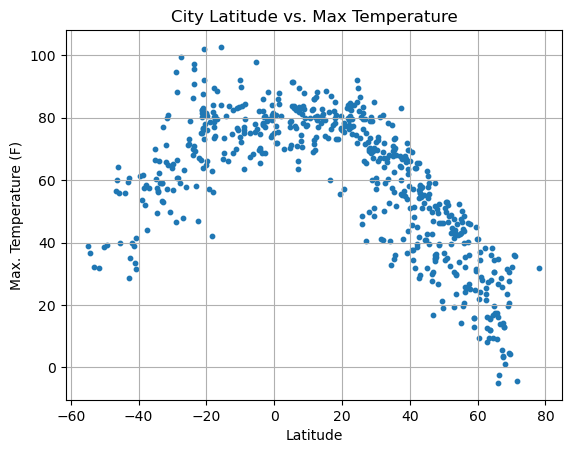

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

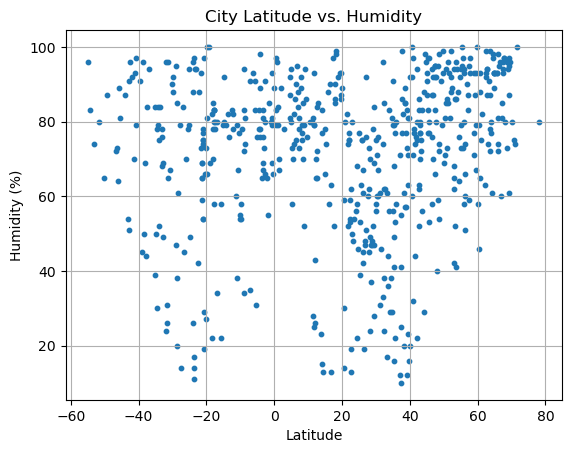

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

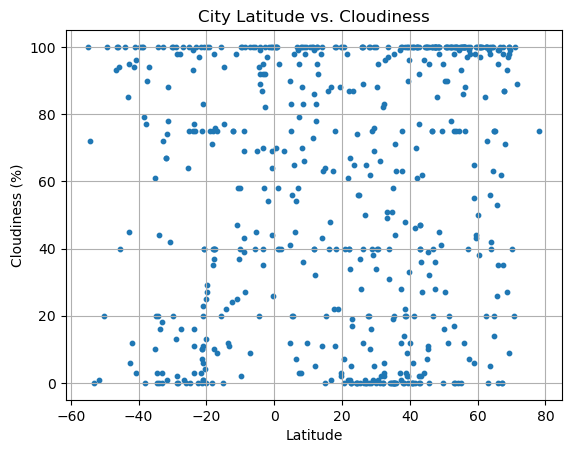

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

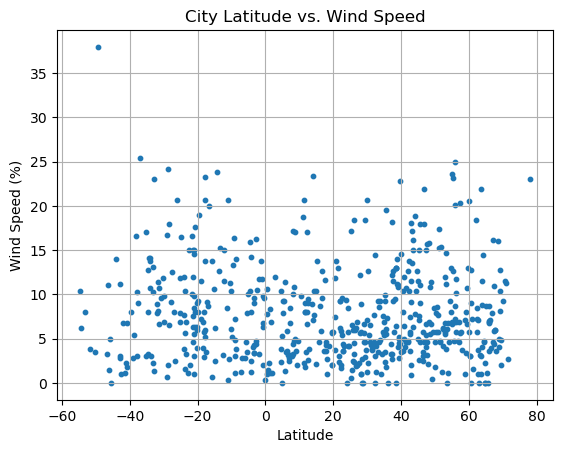

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,35.62,74,100,11.32,SJ,1698728357
1,thompson,55.7435,-97.8558,19.56,73,100,6.91,CA,1698728357
2,misratah,32.3754,15.0925,72.00,62,2,14.50,LY,1698728357
5,datong,40.0936,113.2914,66.20,20,12,14.58,CN,1698728358
6,jhargram,22.4500,86.9833,82.78,54,1,5.82,IN,1698728358


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port elizabeth,-33.9180,25.5701,62.31,75,0,13.80,ZA,1698728357
4,afaahiti,-17.7500,-149.2833,78.67,83,37,20.69,PF,1698728357
10,sao vicente,-23.9631,-46.3919,86.18,26,93,3.83,BR,1698728283
11,puerto natales,-51.7236,-72.4875,31.82,80,1,3.87,CL,1698728074
12,port-aux-francais,-49.3500,70.2167,39.27,87,100,37.94,TF,1698728360


###  Temperature vs. Latitude Linear Regression Plot

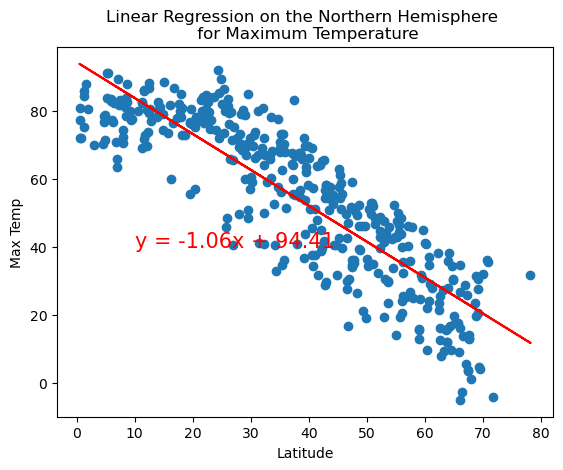

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

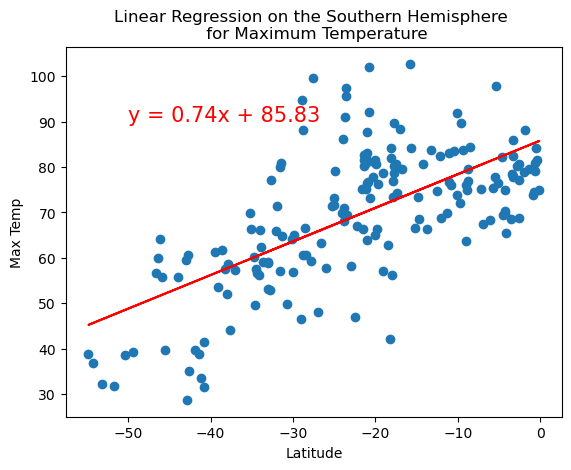

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:From the graph I see a strong linear realtionship 

### Humidity vs. Latitude Linear Regression Plot

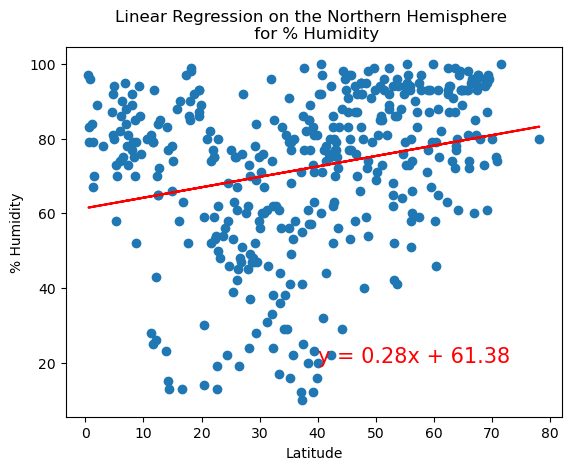

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

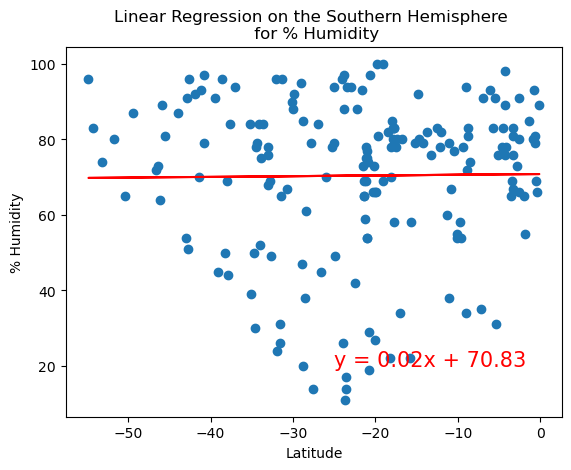

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:From the graph I see a weak linear realtionship

### Cloudiness vs. Latitude Linear Regression Plot

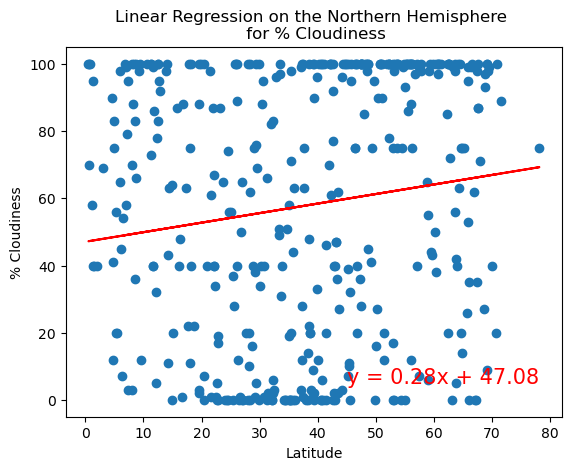

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

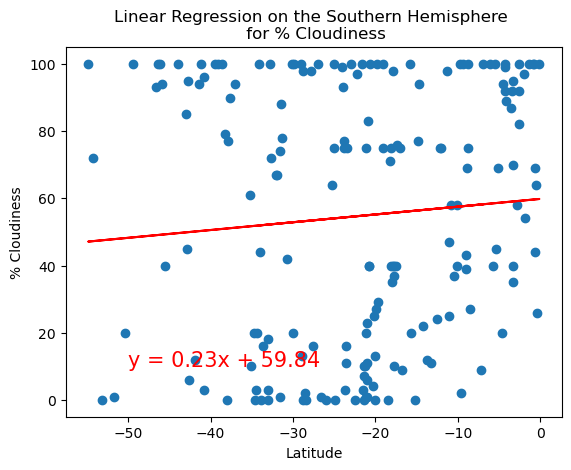

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

**Discussion about the linear relationship:From the graph I see a weak linear realtionship

### Wind Speed vs. Latitude Linear Regression Plot

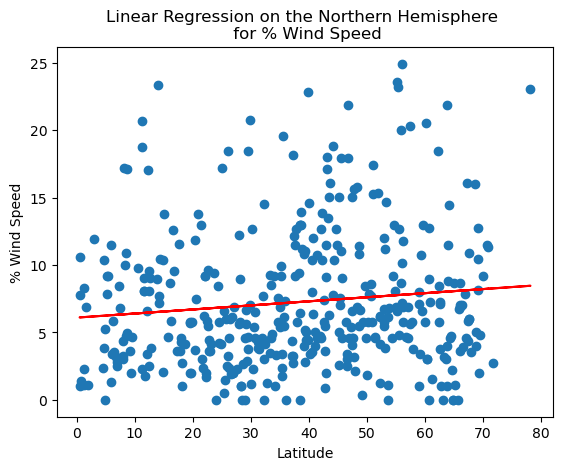

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

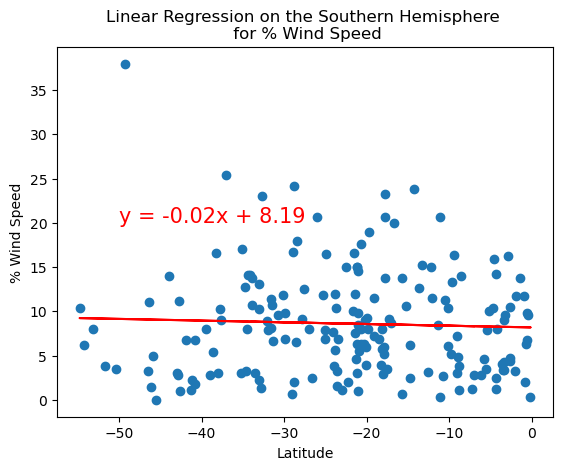

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:From the graph I see a strong linear realtionship